In [1]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/pubhome/xli02/opt/miniconda/envs/

In [2]:
features = pd.read_csv("/pubhome/xli02/project/PLIM/deep_learning/RFscore/featured_data/tow_datasets_features_6A.csv", sep='\t')

In [3]:
vina_title =['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
rf_v1_title = features.columns.tolist()[:36]
feature_list = vina_title+rf_v1_title

In [4]:
dataset_name = 'PDBbind_minimized_intersected_Uw'
test_set = '/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/PDBbind/pdbbind_v2019/minimized/dataset/PDBbind_minimized_intersected_Uw_rm_core_ids/complex_6A/train.csv'

In [5]:
with open(f"/pubhome/xli02/project/PLIM/deep_learning/RFscore/test_res/{dataset_name}_Rm_core/1/best_model_VR1_RF.pkl", "rb") as f:
        model = joblib.load(f)
explainer = shap.TreeExplainer(model)

In [6]:
test_df = pd.read_csv(test_set, sep='\t', header=0, names=['unique_identify', '-logAffi'])
test_set = pd.merge(test_df, features, on=['unique_identify','-logAffi'])
test_set

,unique_identify,-logAffi,6.6,6.7,6.8,6.16,7.6,7.7,7.8,7.16,...,53.8_4-6,53.16_0-2,53.16_2-4,53.16_4-6,vina_gauss1,vina_gauss2,vina_repulsion,vina_hydrophobic,vina_hydrogen,vina_num_rotors
0,3fl9,1.11,242.0,32.0,43.0,2.0,95.0,11.0,25.0,3.0,...,0.0,0.0,0.0,0.0,77.931900,1025.558228,2.005617,28.895309,1.382581,5.0
1,2hdq,1.40,85.0,21.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,46.390400,472.651398,3.314064,15.365729,1.377601,1.0
2,1utp,1.44,137.0,49.0,63.0,15.0,24.0,6.0,12.0,1.0,...,0.0,0.0,0.0,0.0,48.424969,610.846802,3.339483,11.332499,3.281396,4.0
3,1tnk,1.49,154.0,62.0,68.0,11.0,21.0,9.0,12.0,1.0,...,0.0,0.0,0.0,0.0,44.535294,612.992310,2.581305,5.097476,2.014400,3.0
4,1a7t,1.64,92.0,27.0,12.0,1.0,20.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,25.955704,629.644958,2.172195,0.000000,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4629,4wr7,11.70,140.0,32.0,17.0,0.0,25.0,10.0,5.0,0.0,...,0.0,0.0,0.0,0.0,70.986732,1073.320312,5.278033,20.035954,4.039493,4.0
4630,3o9h,12.10,475.0,113.0,145.0,0.0,21.0,5.0,12.0,0.0,...,0.0,0.0,0.0,0.0,137.562210,2241.580566,4.930214,51.794060,4.841943,12.0
4631,3o9g,12.30,468.0,109.0,131.0,0.0,20.0,5.0,11.0,0.0,...,0.0,0.0,0.0,0.0,142.204453,2204.293457,4.456385,65.221024,5.355041,13.0
4632,1q83,12.39,781.0,81.0,149.0,0.0,131.0,15.0,36.0,0.0,...,0.0,0.0,0.0,0.0,219.558884,2573.881592,6.713535,173.556183,1.033494,12.0


# `explainer = shap.TreeExplainer(model); explainer.shap_interaction_values(X)`

In [12]:
shap_values = explainer.shap_interaction_values(test_set[feature_list])

In [17]:
np.save(f"/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/shap_res/test/PDBbind_minimized_intersected_Uw_rm_core_training_1.npy", shap_values)

In [14]:
shap_values.shape

(4634, 42, 42)

In [33]:
type(shap_values)

numpy.ndarray

In [15]:
shap_values[0]

array([[ 2.21520054e-03, -2.17484670e-02, -2.26035620e-02, ...,
         8.10235339e-05,  5.90559381e-05,  1.48530492e-05],
       [-2.17484670e-02, -4.20922264e-01, -4.07361432e-02, ...,
         1.53082360e-04,  1.38314398e-04,  5.27656054e-05],
       [-2.26035620e-02, -4.07361432e-02,  4.27218045e-02, ...,
        -4.78785712e-06,  6.80683376e-06,  5.65740729e-05],
       ...,
       [ 8.10235339e-05,  1.53082360e-04, -4.78785712e-06, ...,
         6.68353123e-05,  7.32647174e-09,  5.37785627e-09],
       [ 5.90559381e-05,  1.38314398e-04,  6.80683376e-06, ...,
         7.32647174e-09,  1.38820668e-04, -8.71658553e-08],
       [ 1.48530492e-05,  5.27656054e-05,  5.65740729e-05, ...,
         5.37785627e-09, -8.71658553e-08, -1.10438035e-04]])

<Figure size 1368x1296 with 0 Axes>

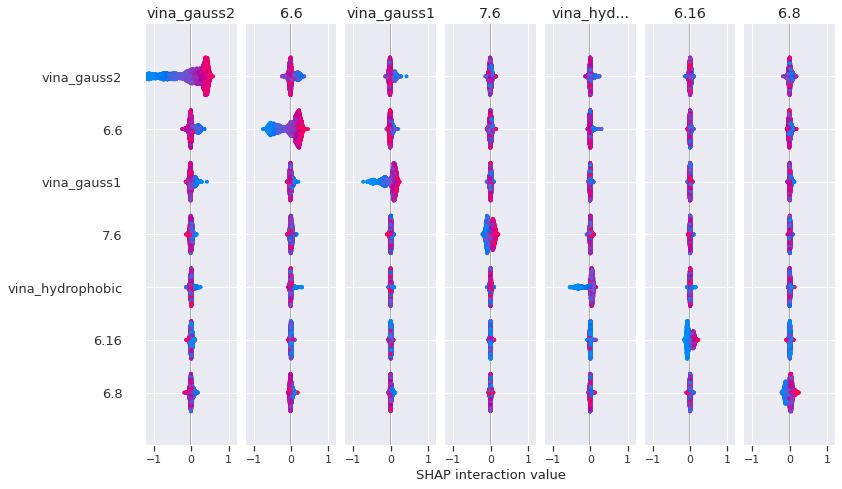

In [19]:
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
shap.summary_plot(shap_values, test_set[feature_list], plot_type="bar", show=False)
# plt.savefig("/pubhome/hzhu02/GPSF/generalization_benchmark/models/general_3_fold_summary/RF_feature/PCV_cluster_plot/PCV_training_1_shap.png", dpi=800, bbox_inches='tight')

<Figure size 1368x1296 with 0 Axes>

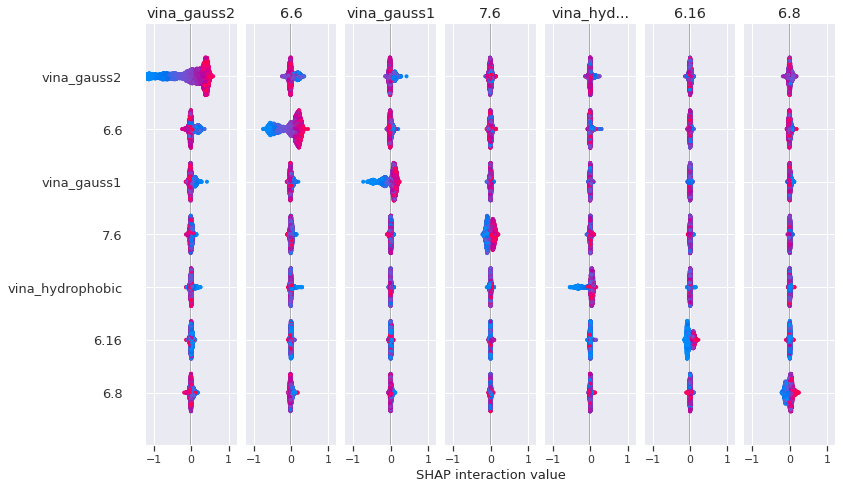

In [121]:
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
shap.summary_plot(shap_values, test_set[feature_list], plot_type="bar", show=False)
# plt.savefig("/pubhome/hzhu02/GPSF/generalization_benchmark/models/general_3_fold_summary/RF_feature/PCV_cluster_plot/PCV_training_1_shap.png", dpi=800, bbox_inches='tight')

In [287]:
np.sum(shap_values, axis=1)[:,1]

array([-0.94276125, -1.21833111, -1.405303  , ...,  0.63754116,
        0.75716992,  0.64128915])

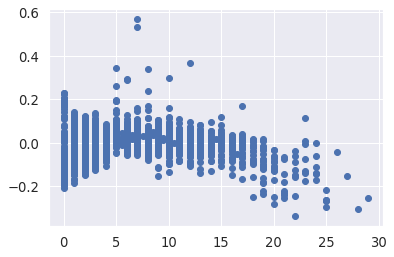

In [291]:
plt.scatter(test_set["vina_num_rotors"],np.sum(shap_values, axis=1)[:,feature_list.index('vina_num_rotors')])

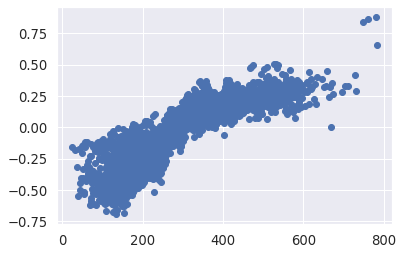

In [290]:
plt.scatter(test_set["6.6"],np.sum(shap_values, axis=1)[:,feature_list.index('6.6')])

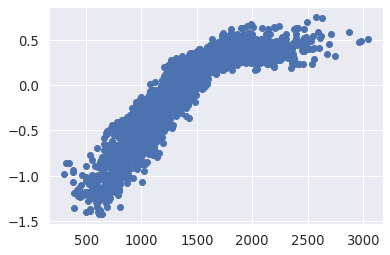

In [288]:
plt.scatter(test_set["vina_gauss2"],np.sum(shap_values, axis=1)[:,feature_list.index('vina_gauss2')])

Text(0, 0.5, 'vina_gauss2')

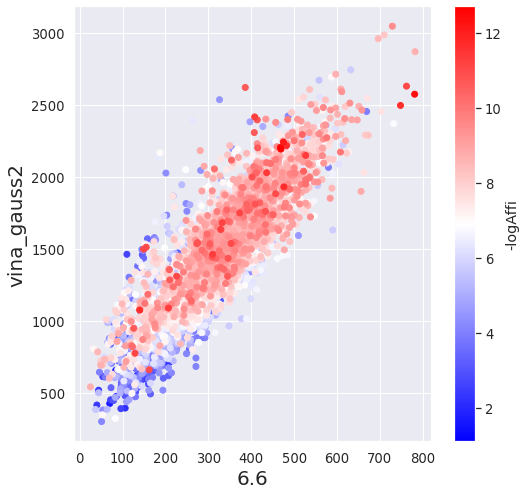

In [272]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(test_set["6.6"],test_set["vina_gauss2"],c=test_set["-logAffi"],cmap='bwr')
plt.colorbar(label="-logAffi", orientation="vertical")

plt.xlabel('6.6',size=20)
plt.ylabel('vina_gauss2',size=20)

# plt.savefig(path.format('weight_interaction.png'),dpi=200,bbox_inches='tight')

Text(0, 0.5, '-logAffi')

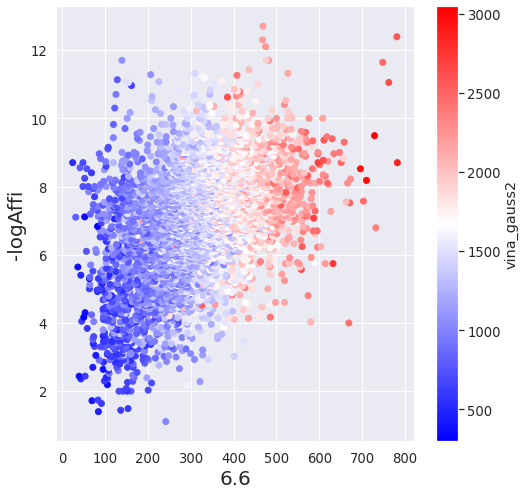

In [271]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(test_set["6.6"],test_set["-logAffi"],c=test_set["vina_gauss2"],cmap='bwr')
plt.colorbar(label="vina_gauss2", orientation="vertical")

plt.xlabel('6.6',size=20)
plt.ylabel('-logAffi',size=20)

# plt.savefig(path.format('weight_interaction.png'),dpi=200,bbox_inches='tight')

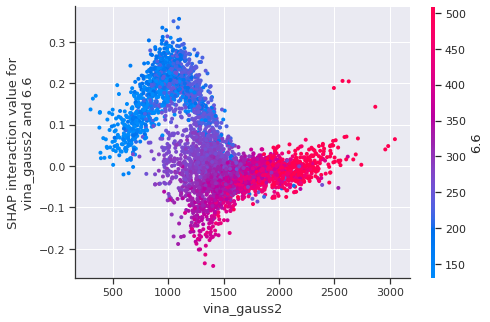

In [266]:
shap.dependence_plot(
    ("vina_gauss2", "6.6"),
    shap_values, test_set[feature_list],
    display_features=test_set[feature_list])

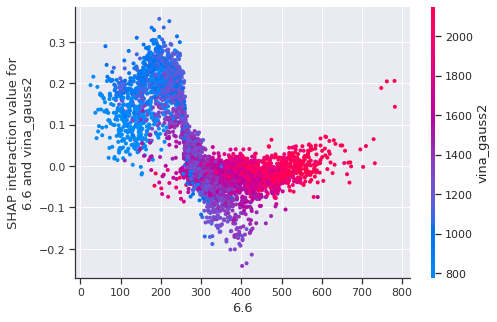

In [267]:
shap.dependence_plot(
    ("6.6", "vina_gauss2"),
    shap_values, test_set[feature_list],
    display_features=test_set[feature_list])

In [247]:
# mean_shap = np.abs(shap_values).mean(0)
# df = pd.DataFrame(mean_shap,index=feature_list,columns=feature_list)
# df.head(5)

,vina_gauss1,vina_gauss2,vina_repulsion,vina_hydrophobic,vina_hydrogen,vina_num_rotors,6.6,6.7,6.8,6.16,...,17.8,17.16,35.6,35.7,35.8,35.16,53.6,53.7,53.8,53.16
vina_gauss1,0.141756,0.025085,0.005999,0.005101,0.003830,0.006182,0.013359,0.005378,0.008789,0.005661,...,0.000710,0.000173,0.000128,0.000128,0.000143,0.000047,0.000060,0.000083,0.000097,0.000023
vina_gauss2,0.025085,0.392227,0.012913,0.013631,0.008152,0.017261,0.036720,0.011331,0.015442,0.010028,...,0.001476,0.000388,0.000207,0.000193,0.000230,0.000068,0.000118,0.000150,0.000191,0.000045
vina_repulsion,0.005999,0.012913,0.045474,0.003967,0.003050,0.003101,0.008971,0.002750,0.003023,0.002671,...,0.000561,0.000102,0.000053,0.000051,0.000054,0.000019,0.000022,0.000020,0.000024,0.000019
vina_hydrophobic,0.005101,0.013631,0.003967,0.080467,0.002854,0.002954,0.009578,0.003510,0.004618,0.004826,...,0.000488,0.000095,0.000060,0.000047,0.000051,0.000015,0.000038,0.000041,0.000049,0.000017
vina_hydrogen,0.003830,0.008152,0.003050,0.002854,0.033850,0.002672,0.005509,0.002661,0.003015,0.002832,...,0.000560,0.000084,0.000061,0.000056,0.000048,0.000019,0.000030,0.000030,0.000034,0.000016


In [251]:
# df.where(df.values == np.diagonal(df), df.values*2, inplace=True)
# df.head()

,vina_gauss1,vina_gauss2,vina_repulsion,vina_hydrophobic,vina_hydrogen,vina_num_rotors,6.6,6.7,6.8,6.16,...,17.8,17.16,35.6,35.7,35.8,35.16,53.6,53.7,53.8,53.16
vina_gauss1,0.141756,0.050170,0.011998,0.010203,0.007661,0.012364,0.026718,0.010756,0.017579,0.011322,...,0.001420,0.000345,0.000256,0.000255,0.000287,0.000094,0.000120,0.000166,0.000195,0.000047
vina_gauss2,0.050170,0.392227,0.025826,0.027262,0.016305,0.034522,0.073440,0.022661,0.030883,0.020057,...,0.002952,0.000775,0.000414,0.000385,0.000460,0.000136,0.000237,0.000300,0.000381,0.000090
vina_repulsion,0.011998,0.025826,0.045474,0.007934,0.006101,0.006202,0.017942,0.005500,0.006045,0.005343,...,0.001121,0.000204,0.000105,0.000101,0.000108,0.000039,0.000043,0.000040,0.000047,0.000037
vina_hydrophobic,0.010203,0.027262,0.007934,0.080467,0.005709,0.005908,0.019157,0.007019,0.009237,0.009653,...,0.000975,0.000189,0.000119,0.000093,0.000102,0.000030,0.000077,0.000083,0.000097,0.000035
vina_hydrogen,0.007661,0.016305,0.006101,0.005709,0.033850,0.005345,0.011018,0.005323,0.006031,0.005663,...,0.001120,0.000167,0.000122,0.000111,0.000095,0.000038,0.000059,0.000060,0.000068,0.000031


Text(0.5, 1.0, 'Training set: PDBbind_minimized_intersected_Uw')

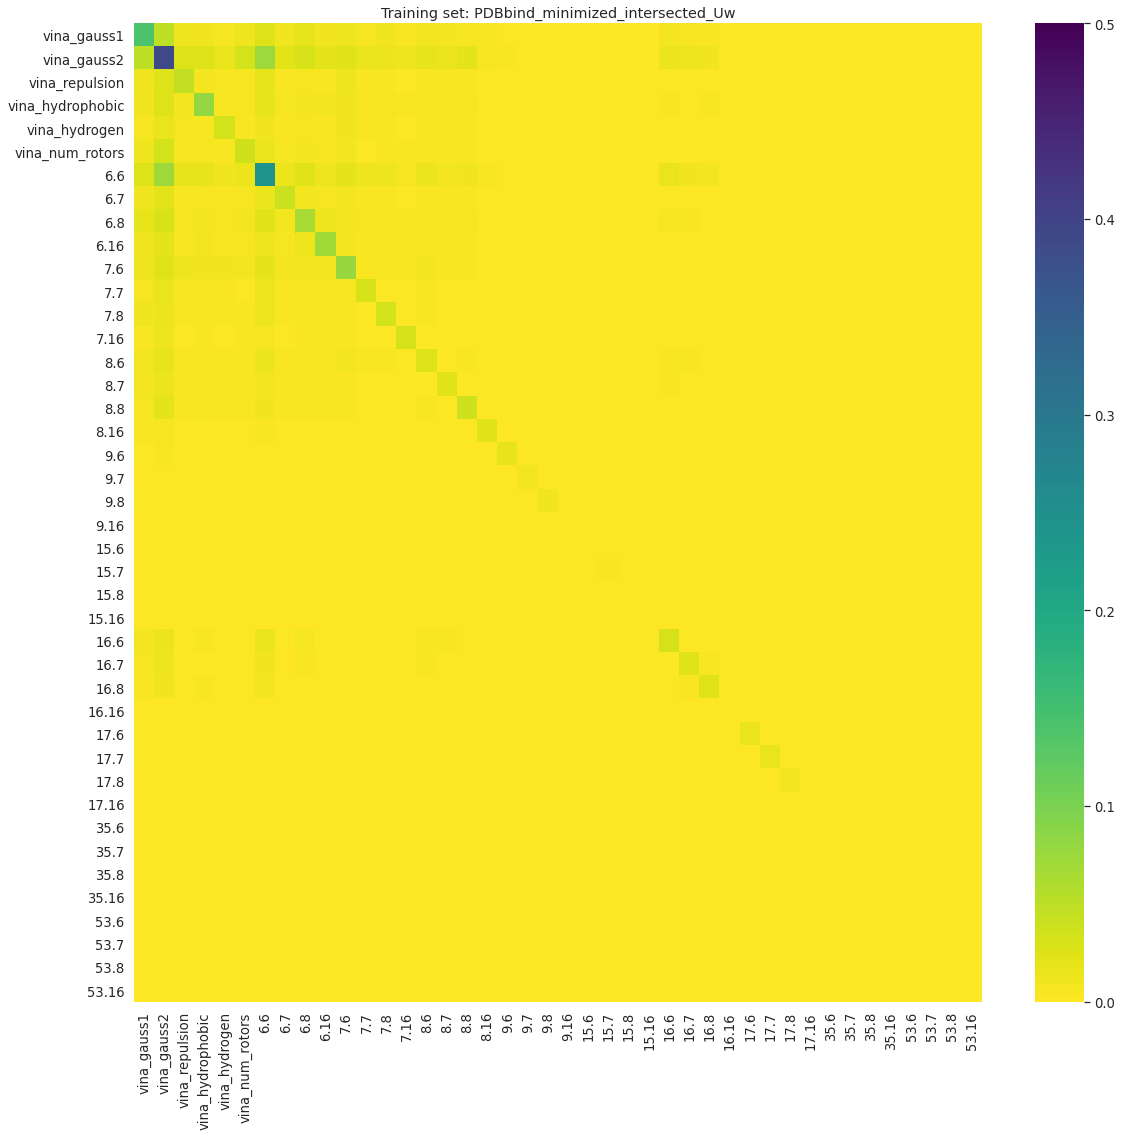

In [20]:

cm = plt.cm.get_cmap('viridis_r')
mean_shap = np.abs(shap_values).mean(0)
df = pd.DataFrame(mean_shap,index=feature_list,columns=feature_list)
df.where(df.values == np.diagonal(df), df.values*2, inplace=True)

plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(df,cmap=cm,fmt='.3g',cbar=True,vmin=0, vmax=0.5)
plt.yticks(rotation=0) 
plt.title("Training set: PDBbind_minimized_intersected_Uw")
# plt.savefig("/pubhome/hzhu02/GPSF/generalization_benchmark/models/general_3_fold_summary/RF_feature/PCV_cluster_plot/PCV_heatmap_training_1.png", dpi=800, bbox_inches='tight')
                        

In [23]:
df.sum()

vina_gauss1         0.402282
vina_gauss2         0.890345
vina_repulsion      0.199389
vina_hydrophobic    0.254519
vina_hydrogen       0.157460
vina_num_rotors     0.188763
6.6                 0.605078
6.7                 0.178465
6.8                 0.265898
6.16                0.229148
7.6                 0.269525
7.7                 0.137572
7.8                 0.149898
7.16                0.118532
8.6                 0.157557
8.7                 0.133026
8.8                 0.155017
8.16                0.086585
9.6                 0.064506
9.7                 0.038191
9.8                 0.045998
9.16                0.010535
15.6                0.011924
15.7                0.014622
15.8                0.010020
15.16               0.000857
16.6                0.134121
16.7                0.102513
16.8                0.097645
16.16               0.009590
17.6                0.049274
17.7                0.049070
17.8                0.034329
17.16               0.006149
35.6          

# `explainer = shap.TreeExplainer(model); explainer.shap_values(X)`

In [48]:
shap_values_not_inter = explainer.shap_values(test_set[feature_list])
shap_values_not_inter.shape

(4634, 42)

In [163]:
np.save(f"/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/shap_res/test/PDBbind_minimized_intersected_Uw_rm_core_training_1_not_interaction_value.npy", shap_values_not_inter)

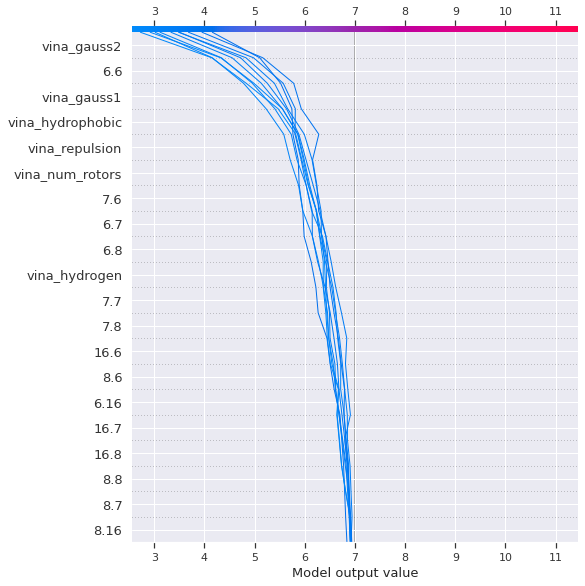

In [192]:
# Decision Plot
expected_value = explainer.expected_value
shap.decision_plot(expected_value, shap_values_not_inter[:10],feature_names=feature_list,ignore_warnings=True)

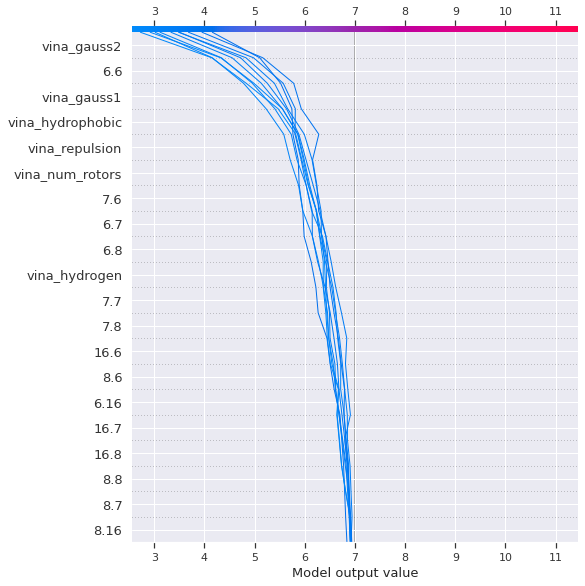

In [193]:
# Decision Plot
expected_value = explainer.expected_value
shap.decision_plot(expected_value, shap_.values[:10],feature_names=feature_list,ignore_warnings=True)

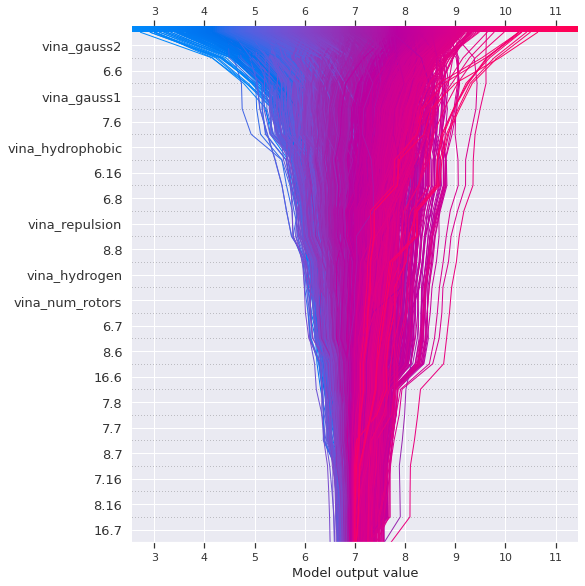

In [59]:
# Decision Plot
expected_value = explainer.expected_value
shap.decision_plot(expected_value, shap_values_not_inter,feature_names=feature_list,ignore_warnings=True)

In [96]:
expected_value

7.0010706085455325

In [50]:
shap_values_not_inter

array([[-2.23837749e-01, -9.42761248e-01, -1.05625051e-01, ...,
        -3.19546948e-05,  5.16561483e-05, -8.30559845e-05],
       [-3.82411821e-01, -1.21833111e+00, -1.41291869e-01, ...,
        -1.13798598e-04, -2.39860955e-05, -9.76714500e-05],
       [-5.69394720e-01, -1.40530300e+00, -1.12527138e-01, ...,
        -4.37295321e-04, -2.33199736e-04, -4.01621174e-04],
       ...,
       [ 2.37014768e-01,  6.37541161e-01,  9.74786776e-03, ...,
         1.16953279e-04, -1.53649224e-04, -8.26889772e-05],
       [ 4.87683200e-01,  7.57169924e-01,  5.49627146e-03, ...,
        -7.58624841e-06, -2.79419920e-05, -5.51258771e-05],
       [ 2.42756380e-01,  6.41289147e-01,  9.91770284e-03, ...,
         9.74450571e-05, -1.41537172e-04, -8.08765660e-05]])

# `explainer = shap.TreeExplainer(model); explan_obj=explainer(X); shap.plots.bar/beeswarm(explan_obj)`

In [7]:
shap_ = explainer(test_set[feature_list])
# shap_.shape

In [31]:
shap_[0]

.values =
array([-2.23837749e-01, -9.42761248e-01, -1.05625051e-01, -2.11341546e-02,
       -9.45976064e-02, -1.89326712e-02, -4.18536609e-01, -2.70870721e-02,
       -1.39799293e-01, -1.15782836e-01, -7.18705192e-02, -4.48211252e-02,
       -1.76712265e-01, -7.28159409e-02, -8.07709440e-02, -2.00772733e-02,
       -2.04523670e-02, -2.62025915e-02, -1.96944816e-02, -1.31829090e-02,
       -1.20959499e-02, -6.98223599e-04, -3.04393985e-04,  1.16001932e-03,
        4.97681332e-04,  3.67668798e-05, -6.12732903e-02, -3.77697344e-02,
       -3.50341695e-02, -1.66209425e-04, -1.59027633e-02, -1.37933251e-02,
       -1.26626334e-02, -7.08670487e-04, -1.66226321e-04, -1.93168166e-04,
       -1.09340537e-04, -1.20944061e-04, -3.74524317e-05, -3.19546948e-05,
        5.16561483e-05, -8.30559845e-05])

.base_values =
array([7.00107061])

.data =
array([  77.93190002, 1025.55822754,    2.0056169 ,   28.89530945,
          1.38258111,    5.        ,  242.        ,   32.        ,
         43.       

In [26]:
(np.array(test_set[feature_list]) == shap_.data).all()

True

In [32]:
shap_.values.shape

(4634, 42)

In [28]:
shap_.base_values.shape

(4634, 1)

In [29]:
shap_.base_values

array([[7.00107061],
       [7.00107061],
       [7.00107061],
       ...,
       [7.00107061],
       [7.00107061],
       [7.00107061]])

In [10]:
getattr(shap_, "lower_bounds", None) is None

True

In [207]:
(shap_.values == shap_values_not_inter).all()

True

In [214]:
(np.around(np.sum(shap_values, axis=1), 4) == np.around(shap_values_not_inter, 4)).all()

True

In [103]:
# from shap.plots._utils import convert_ordering
# order=shap.Explanation.abs.mean(0)
# convert_ordering(order, shap_.values)

array([ 1,  4,  6,  0, 10,  3,  9,  8,  2, 16,  5,  7, 14, 26, 12, 11, 15,
       13, 17, 27, 28, 18, 31, 30, 20, 32, 19, 23, 22, 24, 21, 29, 33, 34,
       36, 35, 40, 39, 38, 41, 37, 25])

In [113]:
# (convert_ordering(order, shap.Explanation(np.abs(shap_.values))) == convert_ordering(order, shap_.values)).all()

True

In [111]:
# np.mean(np.abs(shap_.values), axis=0)

array([1.01460469e-01, 3.37372879e-01, 4.65455613e-02, 6.59458208e-02,
       2.90311045e-01, 3.46506350e-02, 1.83034843e-01, 3.42248855e-02,
       5.01970113e-02, 6.08209787e-02, 6.61244348e-02, 2.90768121e-02,
       3.04677544e-02, 2.69750303e-02, 3.29904907e-02, 2.78919181e-02,
       4.02875355e-02, 2.20039853e-02, 1.74581545e-02, 7.96470410e-03,
       1.10601396e-02, 2.11491271e-03, 2.71228090e-03, 4.39587272e-03,
       2.17238361e-03, 1.00331896e-04, 3.18734405e-02, 2.15882147e-02,
       2.05706865e-02, 1.34681311e-03, 1.49147532e-02, 1.61529346e-02,
       9.43120510e-03, 1.13621775e-03, 7.11126356e-04, 5.68406819e-04,
       7.05698364e-04, 2.07007427e-04, 3.67814616e-04, 3.77063439e-04,
       3.94685296e-04, 2.10812236e-04])

In [254]:
np.mean(np.abs(shap_values_not_inter), axis=0)

array([1.01460469e-01, 3.37372879e-01, 4.65455613e-02, 6.59458208e-02,
       3.83115323e-02, 3.46506350e-02, 1.83034843e-01, 3.42248855e-02,
       5.01970113e-02, 6.08209787e-02, 6.61244348e-02, 2.90768121e-02,
       3.04677544e-02, 2.69750303e-02, 3.29904907e-02, 2.78919181e-02,
       4.02875355e-02, 2.20039853e-02, 1.74581545e-02, 7.96470410e-03,
       1.10601396e-02, 2.11491271e-03, 2.71228090e-03, 4.39587272e-03,
       2.17238361e-03, 1.00331896e-04, 3.18734405e-02, 2.15882147e-02,
       2.05706865e-02, 1.34681311e-03, 1.49147532e-02, 1.61529346e-02,
       9.43120510e-03, 1.13621775e-03, 7.11126356e-04, 5.68406819e-04,
       7.05698364e-04, 2.07007427e-04, 3.67814616e-04, 3.77063439e-04,
       3.94685296e-04, 2.10812236e-04])

In [265]:
np.mean(np.abs(np.sum(shap_values, axis=1)), axis=0)

array([1.01460469e-01, 3.37372879e-01, 4.65455613e-02, 6.59458208e-02,
       3.83115323e-02, 3.46506350e-02, 1.83034843e-01, 3.42248855e-02,
       5.01970113e-02, 6.08209787e-02, 6.61244348e-02, 2.90768121e-02,
       3.04677544e-02, 2.69750303e-02, 3.29904907e-02, 2.78919181e-02,
       4.02875355e-02, 2.20039853e-02, 1.74581545e-02, 7.96470410e-03,
       1.10601396e-02, 2.11491271e-03, 2.71228090e-03, 4.39587272e-03,
       2.17238361e-03, 1.00331896e-04, 3.18734405e-02, 2.15882147e-02,
       2.05706865e-02, 1.34681311e-03, 1.49147532e-02, 1.61529346e-02,
       9.43120510e-03, 1.13621775e-03, 7.11126356e-04, 5.68406819e-04,
       7.05698364e-04, 2.07007427e-04, 3.67814616e-04, 3.77063439e-04,
       3.94685296e-04, 2.10812236e-04])

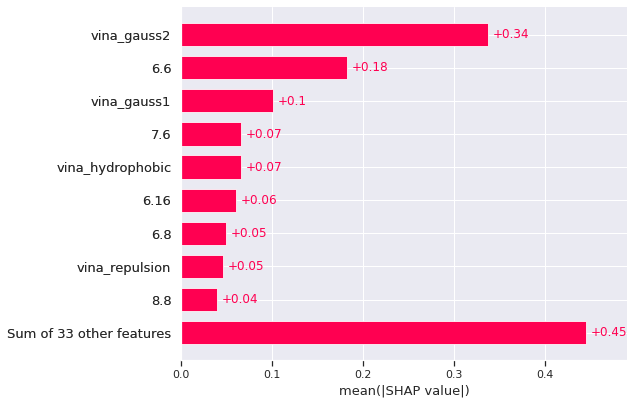

In [176]:
#Mean SHAP
shap.plots.bar(shap_)

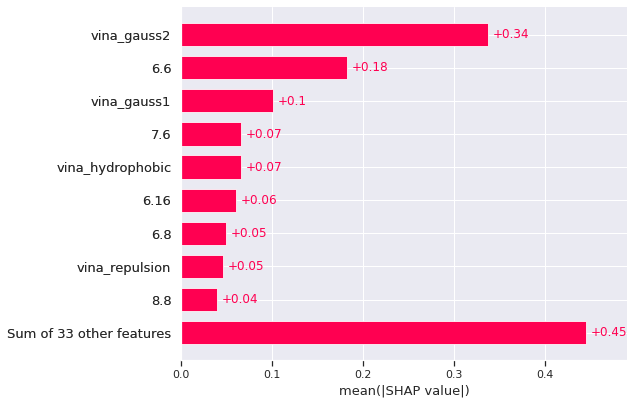

In [175]:
#Mean SHAP
shap.plots.bar(shap_)

# `beeswarm`会改变`shap_obj`!!!
- https://github.com/slundberg/shap/issues/2240
```python
import copy; 
shap_values2 = copy.deepcopy(shap_)
shap.plots.beeswarm(shap_values2)
```

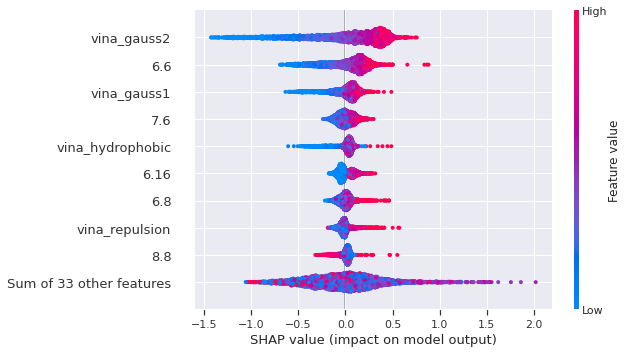

In [177]:
# Beeswarm plot
import copy
shap_values2 = copy.deepcopy(shap_)
shap.plots.beeswarm(shap_values2)

In [204]:
from shap.plots._utils import convert_ordering, convert_color, merge_nodes, get_sort_order, sort_inds
from shap.plots._labels import labels
import scipy as sp
from shap.plots import colors
import matplotlib.pyplot as pl
from shap.utils import safe_isinstance
def beeswarm(values, x_data, feature_names,max_display=10, order=shap.Explanation.abs.mean(0),
             clustering=None, cluster_threshold=0.5, color=None,
             axis_color="#333333", alpha=1, show=True, log_scale=False,
             color_bar=True, plot_size="auto", color_bar_label=labels["FEATURE_VALUE"]):

    # support passing an explanation object

    values = values
    features = x_data
    if sp.sparse.issparse(features):
        features = features.toarray()
    # if out_names is None: # TODO: waiting for slicer support
    #     out_names = shap_exp.output_names

    order = convert_ordering(order, values)

    # default color:
    if color is None:
        if features is not None:
            color = colors.red_blue
        else:
            color = colors.blue_rgb
    color = convert_color(color)

    idx2cat = None
    # convert from a DataFrame or other types
    if str(type(features)) == "<class 'pandas.core.frame.DataFrame'>":
        if feature_names is None:
            feature_names = features.columns
        # feature index to category flag
        idx2cat = features.dtypes.astype(str).isin(["object", "category"]).tolist()
        features = features.values
    elif isinstance(features, list):
        if feature_names is None:
            feature_names = features
        features = None
    elif (features is not None) and len(features.shape) == 1 and feature_names is None:
        feature_names = features
        features = None

    num_features = values.shape[1]

    if features is not None:
        shape_msg = "The shape of the shap_values matrix does not match the shape of the " \
                    "provided data matrix."
        if num_features - 1 == features.shape[1]:
            assert False, shape_msg + " Perhaps the extra column in the shap_values matrix is the " \
                          "constant offset? Of so just pass shap_values[:,:-1]."
        else:
            assert num_features == features.shape[1], shape_msg

    if feature_names is None:
        feature_names = np.array([labels['FEATURE'] % str(i) for i in range(num_features)])

    if log_scale:
        pl.xscale('symlog')

    if clustering is None:
        partition_tree = getattr(shap_values, "clustering", None)
        if partition_tree is not None and partition_tree.var(0).sum() == 0:
            partition_tree = partition_tree[0]
        else:
            partition_tree = None
    elif clustering is False:
        partition_tree = None
    else:
        partition_tree = clustering
    
    if partition_tree is not None:
        assert partition_tree.shape[1] == 4, "The clustering provided by the Explanation object does not seem to be a partition tree (which is all shap.plots.bar supports)!"

    # plotting SHAP interaction values
    if len(values.shape) == 3:

        if plot_type == "compact_dot":
            new_values = values.reshape(values.shape[0], -1)
            new_features = np.tile(features, (1, 1, features.shape[1])).reshape(features.shape[0], -1)

            new_feature_names = []
            for c1 in feature_names:
                for c2 in feature_names:
                    if c1 == c2:
                        new_feature_names.append(c1)
                    else:
                        new_feature_names.append(c1 + "* - " + c2)

            return beeswarm(
                new_values, new_features, new_feature_names,
                max_display=max_display, plot_type="dot", color=color, axis_color=axis_color,
                title=title, alpha=alpha, show=show, sort=sort,
                color_bar=color_bar, plot_size=plot_size, class_names=class_names,
                color_bar_label="*" + color_bar_label
            )

        if max_display is None:
            max_display = 7
        else:
            max_display = min(len(feature_names), max_display)

        interaction_sort_inds = order#np.argsort(-np.abs(values.sum(1)).sum(0))

        # get plotting limits
        delta = 1.0 / (values.shape[1] ** 2)
        slow = np.nanpercentile(values, delta)
        shigh = np.nanpercentile(values, 100 - delta)
        v = max(abs(slow), abs(shigh))
        slow = -v
        shigh = v

        pl.figure(figsize=(1.5 * max_display + 1, 0.8 * max_display + 1))
        pl.subplot(1, max_display, 1)
        proj_values = values[:, interaction_sort_inds[0], interaction_sort_inds]
        proj_values[:, 1:] *= 2  # because off diag effects are split in half
        beeswarm(
            proj_values, features[:, interaction_sort_inds] if features is not None else None,
            feature_names=feature_names[interaction_sort_inds],
            sort=False, show=False, color_bar=False,
            plot_size=None,
            max_display=max_display
        )
        pl.xlim((slow, shigh))
        pl.xlabel("")
        title_length_limit = 11
        pl.title(shorten_text(feature_names[interaction_sort_inds[0]], title_length_limit))
        for i in range(1, min(len(interaction_sort_inds), max_display)):
            ind = interaction_sort_inds[i]
            pl.subplot(1, max_display, i + 1)
            proj_values = values[:, ind, interaction_sort_inds]
            proj_values *= 2
            proj_values[:, i] /= 2  # because only off diag effects are split in half
            summary(
                proj_values, features[:, interaction_sort_inds] if features is not None else None,
                sort=False,
                feature_names=["" for i in range(len(feature_names))],
                show=False,
                color_bar=False,
                plot_size=None,
                max_display=max_display
            )
            pl.xlim((slow, shigh))
            pl.xlabel("")
            if i == min(len(interaction_sort_inds), max_display) // 2:
                pl.xlabel(labels['INTERACTION_VALUE'])
            pl.title(shorten_text(feature_names[ind], title_length_limit))
        pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)
        pl.subplots_adjust(hspace=0, wspace=0.1)
        if show:
            pl.show()
        return

    # determine how many top features we will plot
    if max_display is None:
        max_display = len(feature_names)
    num_features = min(max_display, len(feature_names))

    # iteratively merge nodes until we can cut off the smallest feature values to stay within
    # num_features without breaking a cluster tree
    orig_inds = [[i] for i in range(len(feature_names))]
    orig_values = values.copy()
    while True:
        feature_order = convert_ordering(order, shap.Explanation(np.abs(values)))
        if partition_tree is not None:

            # compute the leaf order if we were to show (and so have the ordering respect) the whole partition tree
            clust_order = sort_inds(partition_tree, np.abs(values))

            # now relax the requirement to match the parition tree ordering for connections above cluster_threshold
            dist = scipy.spatial.distance.squareform(scipy.cluster.hierarchy.cophenet(partition_tree))
            feature_order = get_sort_order(dist, clust_order, cluster_threshold, feature_order)
        
            # if the last feature we can display is connected in a tree the next feature then we can't just cut
            # off the feature ordering, so we need to merge some tree nodes and then try again.
            if max_display < len(feature_order) and dist[feature_order[max_display-1],feature_order[max_display-2]] <= cluster_threshold:
                #values, partition_tree, orig_inds = merge_nodes(values, partition_tree, orig_inds)
                partition_tree, ind1, ind2 = merge_nodes(np.abs(values), partition_tree)
                for i in range(len(values)):
                    values[:,ind1] += values[:,ind2]
                    values = np.delete(values, ind2, 1)
                    orig_inds[ind1] += orig_inds[ind2]
                    del orig_inds[ind2]
            else:
                break
        else:
            break

    # here we build our feature names, accounting for the fact that some features might be merged together
    feature_inds = feature_order[:max_display]
    y_pos = np.arange(len(feature_inds), 0, -1)
    feature_names_new = []
    for pos,inds in enumerate(orig_inds):
        if len(inds) == 1:
            feature_names_new.append(feature_names[inds[0]])
        elif len(inds) <= 2:
            feature_names_new.append(" + ".join([feature_names[i] for i in inds]))
        else:
            max_ind = np.argmax(np.abs(orig_values).mean(0)[inds])
            feature_names_new.append(feature_names[inds[max_ind]] + " + %d other features" % (len(inds)-1))
    feature_names = feature_names_new

    # see how many individual (vs. grouped at the end) features we are plotting
    if num_features < len(values[0]):
        num_cut = np.sum([len(orig_inds[feature_order[i]]) for i in range(num_features-1, len(values[0]))])
        values[:,feature_order[num_features-1]] = np.sum([values[:,feature_order[i]] for i in range(num_features-1, len(values[0]))], 0)
    
    # build our y-tick labels
    yticklabels = [feature_names[i] for i in feature_inds]
    if num_features < len(values[0]):
        yticklabels[-1] = "Sum of %d other features" % num_cut
    
    row_height = 0.4
    if plot_size == "auto":
        pl.gcf().set_size_inches(8, min(len(feature_order), max_display) * row_height + 1.5)
    elif type(plot_size) in (list, tuple):
        pl.gcf().set_size_inches(plot_size[0], plot_size[1])
    elif plot_size is not None:
        pl.gcf().set_size_inches(8, min(len(feature_order), max_display) * plot_size + 1.5)
    pl.axvline(x=0, color="#999999", zorder=-1)

    # make the beeswarm dots
    for pos, i in enumerate(reversed(feature_inds)):
        pl.axhline(y=pos, color="#cccccc", lw=0.5, dashes=(1, 5), zorder=-1)
        shaps = values[:, i]
        fvalues = None if features is None else features[:, i]
        inds = np.arange(len(shaps))
        np.random.shuffle(inds)
        if fvalues is not None:
            fvalues = fvalues[inds]
        shaps = shaps[inds]
        colored_feature = True
        try:
            if idx2cat is not None and idx2cat[i]: # check categorical feature
                colored_feature = False
            else:
                fvalues = np.array(fvalues, dtype=np.float64)  # make sure this can be numeric
        except:
            colored_feature = False
        N = len(shaps)
        # hspacing = (np.max(shaps) - np.min(shaps)) / 200
        # curr_bin = []
        nbins = 100
        quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))
        inds = np.argsort(quant + np.random.randn(N) * 1e-6)
        layer = 0
        last_bin = -1
        ys = np.zeros(N)
        for ind in inds:
            if quant[ind] != last_bin:
                layer = 0
            ys[ind] = np.ceil(layer / 2) * ((layer % 2) * 2 - 1)
            layer += 1
            last_bin = quant[ind]
        ys *= 0.9 * (row_height / np.max(ys + 1))

        if safe_isinstance(color, "matplotlib.colors.Colormap") and features is not None and colored_feature:
            # trim the color range, but prevent the color range from collapsing
            vmin = np.nanpercentile(fvalues, 5)
            vmax = np.nanpercentile(fvalues, 95)
            if vmin == vmax:
                vmin = np.nanpercentile(fvalues, 1)
                vmax = np.nanpercentile(fvalues, 99)
                if vmin == vmax:
                    vmin = np.min(fvalues)
                    vmax = np.max(fvalues)
            if vmin > vmax: # fixes rare numerical precision issues
                vmin = vmax

            assert features.shape[0] == len(shaps), "Feature and SHAP matrices must have the same number of rows!"

            # plot the nan fvalues in the interaction feature as grey
            nan_mask = np.isnan(fvalues)
            pl.scatter(shaps[nan_mask], pos + ys[nan_mask], color="#777777", vmin=vmin,
                        vmax=vmax, s=16, alpha=alpha, linewidth=0,
                        zorder=3, rasterized=len(shaps) > 500)

            # plot the non-nan fvalues colored by the trimmed feature value
            cvals = fvalues[np.invert(nan_mask)].astype(np.float64)
            cvals_imp = cvals.copy()
            cvals_imp[np.isnan(cvals)] = (vmin + vmax) / 2.0
            cvals[cvals_imp > vmax] = vmax
            cvals[cvals_imp < vmin] = vmin
            pl.scatter(shaps[np.invert(nan_mask)], pos + ys[np.invert(nan_mask)],
                        cmap=color, vmin=vmin, vmax=vmax, s=16,
                        c=cvals, alpha=alpha, linewidth=0,
                        zorder=3, rasterized=len(shaps) > 500)
        else:

            pl.scatter(shaps, pos + ys, s=16, alpha=alpha, linewidth=0, zorder=3,
                        color=color if colored_feature else "#777777", rasterized=len(shaps) > 500)


    # draw the color bar
    if safe_isinstance(color, "matplotlib.colors.Colormap") and color_bar and features is not None:
        import matplotlib.cm as cm
        m = cm.ScalarMappable(cmap=color)
        m.set_array([0, 1])
        cb = pl.colorbar(m, ticks=[0, 1], aspect=1000)
        cb.set_ticklabels([labels['FEATURE_VALUE_LOW'], labels['FEATURE_VALUE_HIGH']])
        cb.set_label(color_bar_label, size=12, labelpad=0)
        cb.ax.tick_params(labelsize=11, length=0)
        cb.set_alpha(1)
        cb.outline.set_visible(False)
        bbox = cb.ax.get_window_extent().transformed(pl.gcf().dpi_scale_trans.inverted())
        cb.ax.set_aspect((bbox.height - 0.9) * 20)
        # cb.draw_all()

    pl.gca().xaxis.set_ticks_position('bottom')
    pl.gca().yaxis.set_ticks_position('none')
    pl.gca().spines['right'].set_visible(False)
    pl.gca().spines['top'].set_visible(False)
    pl.gca().spines['left'].set_visible(False)
    pl.gca().tick_params(color=axis_color, labelcolor=axis_color)
    pl.yticks(range(len(feature_inds)), reversed(yticklabels), fontsize=13)
    pl.gca().tick_params('y', length=20, width=0.5, which='major')
    pl.gca().tick_params('x', labelsize=11)
    pl.ylim(-1, len(feature_inds))
    pl.xlabel(labels['VALUE'], fontsize=13)
    if show:
        pl.show()

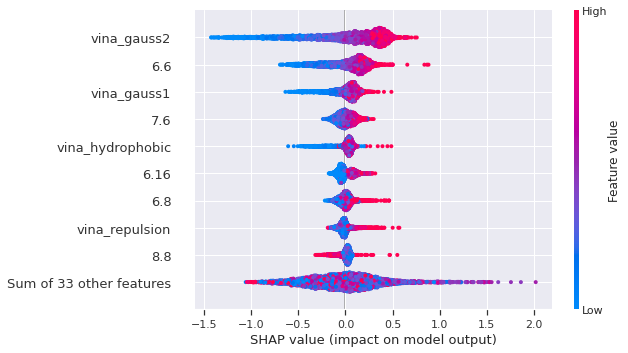

In [206]:
# Beeswarm plot
import copy
shap_values_not_inter_2 = copy.deepcopy(shap_values_not_inter)
beeswarm(shap_values_not_inter_2, test_set[feature_list], feature_list)

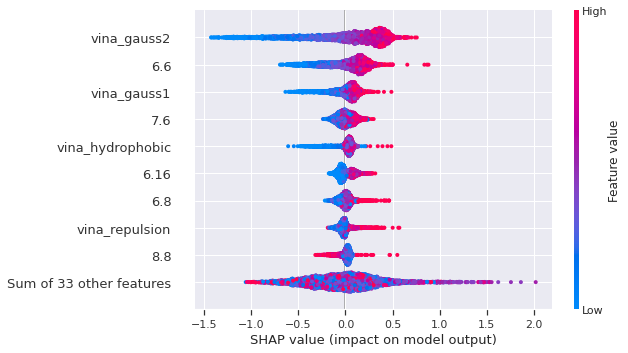

In [170]:
# # Beeswarm plot
# shap.plots.beeswarm(shap_)

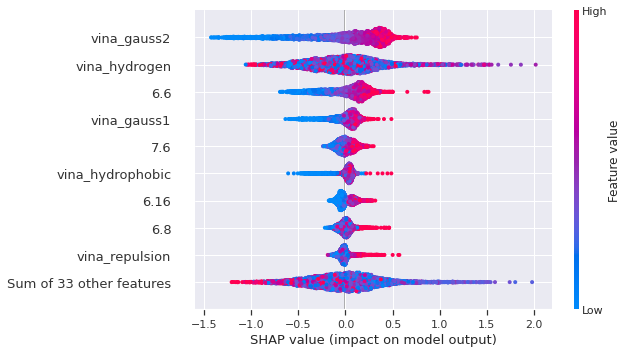

In [171]:
# # Beeswarm plot
# shap.plots.beeswarm(shap_)

# test split

In [218]:
tail_shap = np.load('shap_res/test/training_rep1_xab.npy')
tail_shap.shape

(635, 42, 42)

In [220]:
(tail_shap == shap_values[-635:]).all()

True

<Figure size 1368x1296 with 0 Axes>

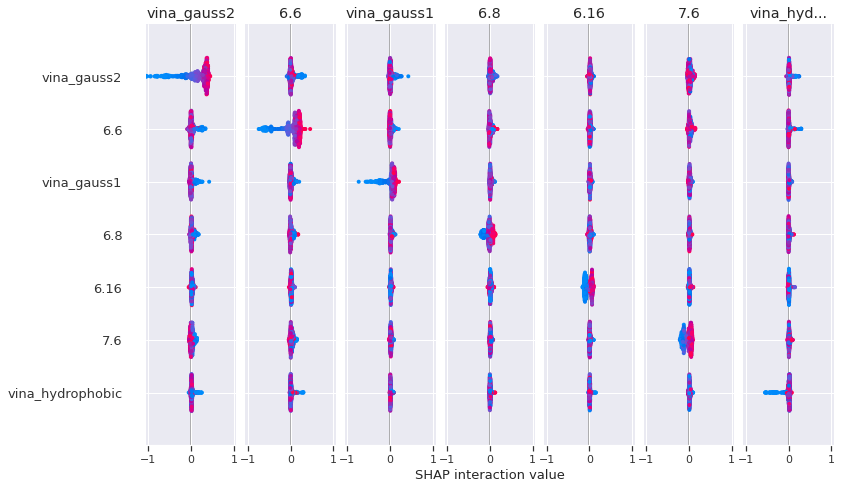

In [223]:
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
shap.summary_plot(tail_shap, test_set[-635:][feature_list], plot_type="bar", show=False)

# top10

In [221]:
shap_values_top10 = explainer.shap_interaction_values(test_set[:10][feature_list])
# shap_values_top10

In [216]:
(shap_values_top10 == shap_values[:10]).all()

True

In [45]:
shap_values_top10_not_inter = explainer.shap_values(test_set[:10][feature_list])
shap_values_top10_not_inter.shape

(10, 42)

In [47]:
shap_values_top10[0]

array([[ 2.21520054e-03, -2.17484670e-02, -2.26035620e-02, ...,
         8.10235339e-05,  5.90559381e-05,  1.48530492e-05],
       [-2.17484670e-02, -4.20922264e-01, -4.07361432e-02, ...,
         1.53082360e-04,  1.38314398e-04,  5.27656054e-05],
       [-2.26035620e-02, -4.07361432e-02,  4.27218045e-02, ...,
        -4.78785712e-06,  6.80683376e-06,  5.65740729e-05],
       ...,
       [ 8.10235339e-05,  1.53082360e-04, -4.78785712e-06, ...,
         6.68353123e-05,  7.32647174e-09,  5.37785627e-09],
       [ 5.90559381e-05,  1.38314398e-04,  6.80683376e-06, ...,
         7.32647174e-09,  1.38820668e-04, -8.71658553e-08],
       [ 1.48530492e-05,  5.27656054e-05,  5.65740729e-05, ...,
         5.37785627e-09, -8.71658553e-08, -1.10438035e-04]])

In [46]:
shap_values_top10_not_inter[0]

array([-2.23837749e-01, -9.42761248e-01, -1.05625051e-01, -2.11341546e-02,
       -9.45976064e-02, -1.89326712e-02, -4.18536609e-01, -2.70870721e-02,
       -1.39799293e-01, -1.15782836e-01, -7.18705192e-02, -4.48211252e-02,
       -1.76712265e-01, -7.28159409e-02, -8.07709440e-02, -2.00772733e-02,
       -2.04523670e-02, -2.62025915e-02, -1.96944816e-02, -1.31829090e-02,
       -1.20959499e-02, -6.98223599e-04, -3.04393985e-04,  1.16001932e-03,
        4.97681332e-04,  3.67668798e-05, -6.12732903e-02, -3.77697344e-02,
       -3.50341695e-02, -1.66209425e-04, -1.59027633e-02, -1.37933251e-02,
       -1.26626334e-02, -7.08670487e-04, -1.66226321e-04, -1.93168166e-04,
       -1.09340537e-04, -1.20944061e-04, -3.74524317e-05, -3.19546948e-05,
        5.16561483e-05, -8.30559845e-05])

# GPUTreeExplainer

In [26]:
explainer_2 = shap.GPUTreeExplainer(model)
shap_values_2 = explainer_2.shap_interaction_values(test_set[feature_list])

cuda extension was not built during install!


ImportError: cannot import name '_cext_gpu'

In [32]:
# %env CUDA_PATH=/usr/local/cuda-11.1/
%env CUDA_PATH=/usr/local/cuda
!echo $CUDA_PATH

explainer_2 = shap.GPUTreeExplainer(model)
shap_values_2 = explainer_2.shap_interaction_values(test_set[feature_list])

env: CUDA_PATH=/usr/local/cuda
/usr/local/cuda
cuda extension was not built during install!


ImportError: cannot import name '_cext_gpu'